Desafio 43: Previsão de Adesão a Plano de Academia

📂 Dataset: Informações de clientes e sua propensão à adesão de um plano de academia.
Colunas: Idade, Sexo, Renda, Frequencia_Exercicio, Adesao_Plano

🎯 Tarefas:

Trate os valores ausentes adequadamente.

Converta variáveis categóricas em numéricas se necessário.

Qual grupo de frequência de exercício tem maior taxa de adesão?

Existe diferença de adesão entre gêneros?

Treine um modelo de regressão logística ou árvore de decisão para prever Adesao_Plano.

Meça a acurácia e interprete os resultados.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("dia_43_adesao_academia.csv")
df.head()

,Idade,Sexo,Renda,Frequencia_Exercicio,Adesao_Plano
0,56,Masculino,3198.85,3-4x/sem,1
1,41,Feminino,2142.74,1-2x/sem,0
2,58,Masculino,1965.55,5x+/sem,0
3,37,Masculino,3417.89,3-4x/sem,1
4,40,Feminino,2078.03,1-2x/sem,0


In [43]:
#Trate os valores ausentes adequadamente.
df["Renda"] = pd.to_numeric(df["Renda"], errors="coerce")
df["Renda"] = df["Renda"].fillna(
    df.groupby("Sexo")["Renda"].transform("mean")
)

df["Frequencia_Exercicio"] = df["Frequencia_Exercicio"].fillna("Nunca")
df["Frequencia_Exercicio"] = df["Frequencia_Exercicio"].replace({"Não informado": "Nunca"})
frequencia = {"Nunca": 0, "1-2x/sem": 1.5, "3-4x/sem": 3.5, "5x+/sem": 6}
df['Frequencia_Exercicio'] = df['Frequencia_Exercicio'].map(frequencia)

df["Frequencia_Exercicio"].unique()


array([3.5, 1.5, 6. , 0. ])

In [44]:
#Converta variáveis categóricas em numéricas se necessário.
le = LabelEncoder()
df["Sexo"] = le.fit_transform(df["Sexo"])
df["Adesao_Plano"] = le.fit_transform(df["Adesao_Plano"])
df.head()

,Idade,Sexo,Renda,Frequencia_Exercicio,Adesao_Plano
0,56,1,3198.85,3.5,1
1,41,0,2142.74,1.5,0
2,58,1,1965.55,6.0,0
3,37,1,3417.89,3.5,1
4,40,0,2078.03,1.5,0


In [45]:
#Qual grupo de frequência de exercício tem maior taxa de adesão?
taxaAdesap = df.groupby("Frequencia_Exercicio")["Adesao_Plano"].mean().sort_values(ascending=False)
print(taxaAdesap)

Frequencia_Exercicio
3.5    0.846154
6.0    0.750000
1.5    0.725806
0.0    0.017544
Name: Adesao_Plano, dtype: float64


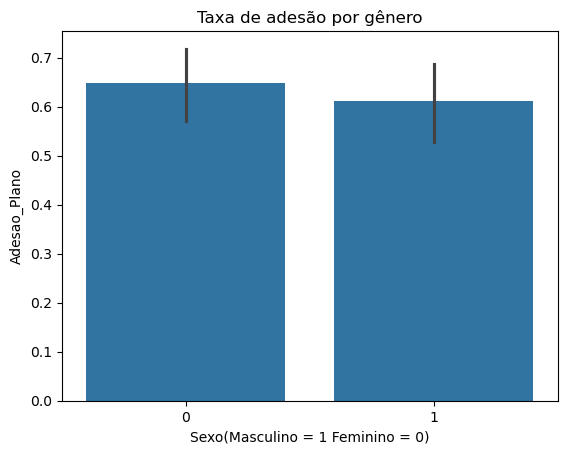

In [46]:
#Existe diferença de adesão entre gêneros?
sns.barplot(data=df, x="Sexo", y="Adesao_Plano")
plt.title("Taxa de adesão por gênero")
plt.xlabel("Sexo(Masculino = 1 Feminino = 0)")
plt.show()

In [47]:
#Treine um modelo de regressão logística ou árvore de decisão para prever Adesao_Plano.
X = df.drop("Adesao_Plano", axis=1)
y = df["Adesao_Plano"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [49]:
#Meça a acurácia e interprete os resultados.
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9888888888888889
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.98      0.99        58

    accuracy                           0.99        90
   macro avg       0.98      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90

